# Analyzing Rhode Island Police Activity
## Introduction
In this exploratory project, we will analyze police behavior in the state of Rhode Island in the United States of America, to practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Preparing the data for analysis

In [33]:
# Read 'police.csv' into a DataFrame named police_dataset
police_dataset = pd.read_csv('police.csv')

# Examine the head of the DataFrame
police_dataset.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [34]:
# Show main information about the DataFrame
police_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB


In [35]:
# Count the number of missing values in each column
print("Missing values: ")
print(police_dataset.isnull().sum())

# Drop the 'county_name' and 'state' columns, because we don't need them
police_dataset.drop(['county_name', 'state'], axis='columns', inplace=True)

Missing values: 
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [36]:
# Count the number of NaN in each column
print("Missing values before droping NaN values: ")
print(police_dataset.isnull().sum())

# Drop all rows that are missing 'driver_gender'
police_dataset.dropna(subset=['driver_gender'], inplace=True)

# Count the number of NaN in each column
print("Missing values after droping NaN values: ")
print(police_dataset.isnull().sum())

# Examine the shape of the DataFrame
print("The shape of the dataset:", police_dataset.shape)

Missing values before droping NaN values: 
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
Missing values after droping NaN values: 
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
The shape of the dataset: (86536, 13)


### Clean The main columns
In this phase we need to clean the main columns that we are going to work with:
- is_arrested: to make it of type bool
- stop_date and stop_time: to make a column of type datetime and make it the index

In [40]:
# Examine the head of the 'is_arrested' column
print(police_dataset.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool' to better handle indexing
police_dataset['is_arrested'] = police_dataset.is_arrested.astype('bool')

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: bool


In [41]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = police_dataset.stop_date.str.cat(police_dataset.stop_time, sep=' ')

# Convert 'combined' to datetime format
police_dataset['stop_datetime'] = pd.to_datetime(combined)

# Set 'stop_datetime' as the index
police_dataset.set_index('stop_datetime', inplace=True)

# Show the main information about the DataFrame after modification
print(police_dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 13 columns):
stop_date             86536 non-null object
stop_time             86536 non-null object
driver_gender         86536 non-null object
driver_race           86536 non-null object
violation_raw         86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null bool
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB
None


## 2. Exploring the relationship between gender and policing
In this phase we invistigate the question "Does the gender of a driver have an impact on police behavior during a traffic stop?" while practicing filtering, grouping, method chaining, etc.

### First question - Do the genders commit different violations?

In [48]:
# First we need to examine violations committed by all drivers
# Count the unique values in 'violation'
print("All violations: ")
print(police_dataset.violation.value_counts())

# Express the counts as proportions
print(30 * "=")
print("The percentage of each violation: ")
print(police_dataset.violation.value_counts(normalize=True) * 100)

All violations: 
Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
The percentage of each violation: 
Speeding               55.957058
Moving violation       18.748267
Equipment              12.620181
Other                   5.094989
Registration/plates     4.279144
Seat belt               3.300361
Name: violation, dtype: float64


In [53]:
# Create a DataFrame of female drivers
female = police_dataset[ police_dataset.driver_gender == 'F' ]

# Create a DataFrame of male drivers
male = police_dataset[ police_dataset.driver_gender == 'M' ]

# Compute the violations by female drivers (as proportions)
print("The violations by female drivers (as proportions): ")
print(female.violation.value_counts(normalize=True) * 100)

# Compute the violations by male drivers (as proportions)
print(31 * '=')
print("The violations by male drivers (as proportions): ")
print(male.violation.value_counts(normalize=True) * 100)

The violations by female drivers (as proportions): 
Speeding               65.811391
Moving violation       13.821822
Equipment              10.519896
Registration/plates     4.441827
Other                   2.973837
Seat belt               2.431227
Name: violation, dtype: float64
The violations by male drivers (as proportions): 
Speeding               52.224276
Moving violation       20.614385
Equipment              13.415761
Other                   5.898474
Registration/plates     4.217520
Seat belt               3.629585
Name: violation, dtype: float64


Through this observations, we can see that the most common violation done by a female, is speeding (65.8%), while not wearing the seat belt is the least common violation done by a female.
Also the most common violation done by males is speeding, but it is only half of the violation (52%), less than the females' (65%). Not wearing seat belt is the least commeted violation by males also.


### Secound question - Does gender affect who gets a ticket for speeding?
In the last question we compared the traffic violations commetted by each gender, now we will narrow our focus to the relationship between gender and stop outcomes for one specific violation, namely speeding.

In [55]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = police_dataset[(police_dataset.driver_gender == 'F') & (police_dataset.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = police_dataset[(police_dataset.driver_gender == 'M') & (police_dataset.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print("Stop outcomes for female drivers (as proportions): ")
print(female_and_speeding.stop_outcome.value_counts(normalize=True) * 100)

# Compute the stop outcomes for male drivers (as proportions)
print(31 * '=')
print("Stop outcomes for male drivers (as proportions): ")
print(male_and_speeding.stop_outcome.value_counts(normalize=True) * 100)

Stop outcomes for female drivers (as proportions): 
Citation            95.219225
Warning              4.007414
Arrest Driver        0.575227
N/D                  0.095871
Arrest Passenger     0.063914
No Action            0.038348
Name: stop_outcome, dtype: float64
Stop outcomes for male drivers (as proportions): 
Citation            94.459530
Warning              3.618391
Arrest Driver        1.589529
Arrest Passenger     0.128139
No Action            0.106782
N/D                  0.097629
Name: stop_outcome, dtype: float64


As of speeding there is no corrolation between gender and the out come of the violation. That police officers generally give people citation for there speeding, actully 95% of the time, and 3.8% of the time give them warning. With the probability of 1.1% of arresting the driver or the passenger.

### Third question - Does gender affect whose vehicle is searched?

In [60]:
# We can calculate the search rate by taking the mean (True = 1, False = 0)
print("Display the percentage of conducting a search: ")
print(police_dataset.search_conducted.mean() * 100)

Display the percentage of conducting a search: 
3.82153092354627


In [64]:
# Calculate the search rate for both groups simultaneously
print(police_dataset.groupby('driver_gender').search_conducted.mean() * 100)

driver_gender
F    1.918062
M    4.542558
Name: search_conducted, dtype: float64


At the first glance we can see that driver gender might affect the probability of being searched, but is it because of just gender, or is it affected by other factors.

In [68]:
# Calculate the search rate for each combination of gender and violation
print(police_dataset.groupby(['violation', 'driver_gender']).search_conducted.mean() * 100)

violation            driver_gender
Equipment            F                 3.998401
                     M                 7.149644
Moving violation     F                 3.925746
                     M                 6.152419
Other                F                 4.101839
                     M                 4.619125
Registration/plates  F                 5.492424
                     M                10.880242
Seat belt            F                 1.730104
                     M                 3.511853
Speeding             F                 0.830883
                     M                 2.788541
Name: search_conducted, dtype: float64


And as we can observe, with different violation, males have a higher probability of being searched, so YES there is a relationship between gender and the vehicle being searched.

## 3. Exploratory Data Analysis

In this section we can analyze the data using visuals, to answer other questions, like the effect of stop time and arresting...

### First question - Does time of day affect arrest rate?

The percentage of the number of making an arrest: 
0.0355690117407784
A table shows the arrest rate for each hour: 
stop_datetime
0     5.143094
1     6.493185
2     6.079821
3     6.054872
4     4.800000
5     4.278075
6     1.381304
7     1.303155
8     2.185350
9     2.520616
10    2.821272
11    2.889667
12    3.739931
13    3.077599
14    3.060458
15    3.067871
16    3.528084
17    4.061896
18    3.820439
19    3.224490
20    3.810734
21    6.454062
22    4.866608
23    4.759152
Name: is_arrested, dtype: float64


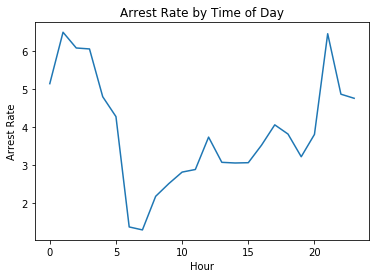

In [74]:
# Calculate the overall arrest rate
print('The percentage of the number of making an arrest: ')
print(police_dataset.is_arrested.mean())

# Calculate the hourly arrest rate
print(30*"=")
print('A table shows the arrest rate for each hour: ')
print(police_dataset.groupby(police_dataset.index.hour).is_arrested.mean() * 100)

# Save the hourly arrest rate
hourly_arrest_rate = police_dataset.groupby(police_dataset.index.hour).is_arrested.mean() * 100

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

So the arrest rate does change over the day, it spikes overnight, and then drops in the early mornings.

### Secound question - Are drug-related stops on the rise?

The percentage of drug-related stops: 
stop_datetime
2005-12-31    0.650142
2006-12-31    0.725790
2007-12-31    0.796989
2008-12-31    0.750514
2009-12-31    0.988858
2010-12-31    1.008121
2011-12-31    0.973141
2012-12-31    0.992102
2013-12-31    1.309351
2014-12-31    1.382648
2015-12-31    1.226614
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


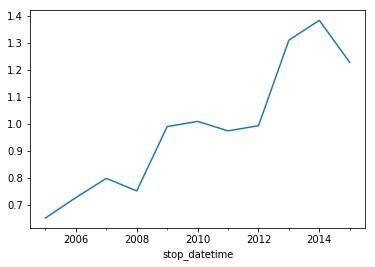

In [79]:
# Calculate the annual rate of drug-related stops
print('The percentage of drug-related stops: ')
print(police_dataset.drugs_related_stop.resample('A').mean() * 100)

# Save the annual rate of drug-related stops
annual_drug_rate = police_dataset.drugs_related_stop.resample('A').mean() * 100

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.show()

This plot demonstrates that there has been an increase in drug-related stop in the recent years, form (0.65%) in 2005, to (1.22%) in 2015. But is it because there has been an increase of vechile search?

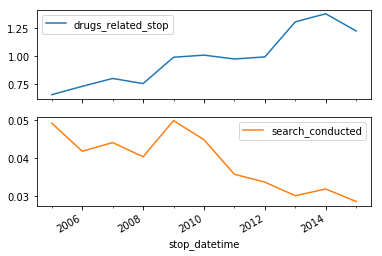

In [84]:
# Calculate and save the annual search rate
annual_search_rate = police_dataset.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)
plt.show()

Actually the oppesite is true, there is an increase in drug-related stops, but with even a decrease in vechile search rate!!

### Third question - What violations are caught in each district?
The state of Rhode Island has six police zones, we need to investigate the distribution of violations in these zones.

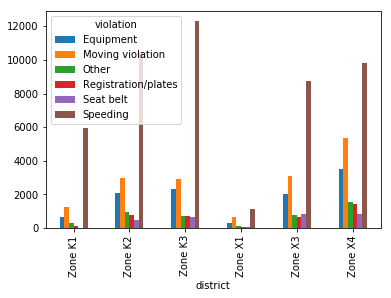

In [86]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(police_dataset['district'], police_dataset['violation'])

# Create a bar plot of 'all_zones'
all_zones.plot(kind='bar')
plt.show()

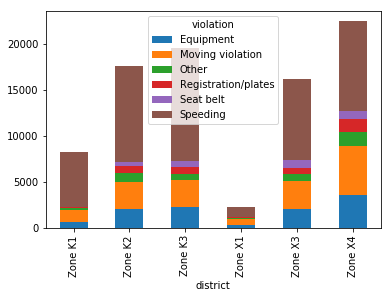

In [87]:
# Create a stacked bar plot of 'all_zones'
all_zones.plot(kind='bar', stacked=True)
plt.show()

With these visualizations we can extract informative insights to improve the policing in Rhode Island state. Like "Registration/plates" violations are low in (Zone K1), so we need to investigate why is that to know how to reduce Registration/plates-related violations in the other zones, etc.